# Data Science and Visualization (RUC F2024)

## Miniproject Report

## Exploring Links: Population Density, Nature and Well-Being

## Group Members:
* Vincent Benedict Garbriel Kosmol, HumTek, 6. semester, vbg@ruc.dk
* Jens Mikkel Schroll Andersen, Humtek, 6. semester, jmsa@ruc.dk
* Victor Kreutzmann, HumTek, 6. semester, kreutzmann@ruc.dk

## Abstract
In this project, we investigate the relation between drug abuse, crime rates, nature per capita and population density across Danish municipalities using data sourced from Danmarks Statistik.
The data was preprocessed to remove null values, correct data types, normalize data and ensure compatibility with analysis tools.
Exploratory data analysis helped to establish basic understanding and potential correlations among the variables.
We employed linear and polynomial regression models to analyze the data. 
Despite the low R-squared value in the OLS model, our analysis provided some predictive insights. 
Both models demonstrated limitations, suggesting that the challenges in predicting crime rates might stem from the simplicity of the data rather than the methodologies applied. The project highlights the need for integrating more diverse datasets and possibly employing advanced machine learning techniques to better capture the complexities of crime phenomena.

## 0. Setup and Data

Importing the modules needed for the project.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib as plt 
import matplotlib.pyplot as plt 
import statsmodels.api as sm  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox

### Data description:
In our project, we analyze the relationship between drug abuse, crime rates, nature per capita, and population density. To perform this analysis, we have sourced data from Danmarks Statistik, which ensures the quality and truthfulness of our data. We have chosen to compare these factors across different municipalities, since this distinction is available in the data.
It is possible to exclude parts of the data when loading the CSV files from Danmarks Statistik. Therefore, the datasets we present have been partially pre-processed.
All training data is from 2016, except for the Population Per Municipality which is from 2021. We have chosen these years because it was the closest all dataset dates could be aligned.
All test data is from 2021. We chose a different year as test data since the specificity of the municipalities made it difficult to separate the data into training and testing.

## 1. Loading the Data
To load the data, we must use ISO-8859-1 encoding and declare ";" as the delimiter. The special characters å, ø, æ are not available in pandas' standard UTF-8 encoding. Because the datasets are of Danish origin, the delimiter must be explicitly declared, since there are different naming conventions for delimiters in different countries.
The datasets are lacking their column names, which will be assigned upon loading the data.

### Loading Training Data

#### Drug Treatment Cases (2016)
This dataset consists of the number of individuals receiving treatment for drug abuse in each municipality.
It consists of 3 columns. The first indicating what stage of treatment they are at: Are they applying, receiving, or finished with their treatment? We have chosen to only consider people currently receiving treatment.
The characters ".." are being used instead of a null value.
It is loaded using the following settings.

In [2]:
# Data Loading
DrugTreatmentCases = pd.read_csv('Data/drug_treatment_cases.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
DrugTreatmentCases.columns = ['Status of Treatment','Municipality', 'Citizens receiving treatment']

# Display the first few rows of the DataFrame 
display(DrugTreatmentCases.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", DrugTreatmentCases.shape)

# Show basic statistics of the DataFrame's numerical data
display(DrugTreatmentCases.describe())

# Reviewing the type of data in each column
DrugTreatmentCases.dtypes

,Status of Treatment,Municipality,Citizens receiving treatment
0,Personer i behandling,Region Hovedstaden,..
1,Personer i behandling,København,2190
2,Personer i behandling,Frederiksberg,276
3,Personer i behandling,Dragør,27
4,Personer i behandling,Tårnby,144



The shape of the DataFrame is: (103, 3)


,Status of Treatment,Municipality,Citizens receiving treatment
count,103,103,103
unique,1,103,80
top,Personer i behandling,Region Hovedstaden,..
freq,103,1,12


Status of Treatment             object
Municipality                    object
Citizens receiving treatment    object
dtype: object

#### Nature Area Per Capita (2016)
This dataset consists of the different types of areas that are available in each municipality.
The areas are measured as square meters per citizen.
It consists of 4 columns. The first indicating the unit of measurement. The second, the type of area. We have chosen to only consider nature areas.
It is loaded using the following settings.

In [3]:
NatureAreaPerCapita = pd.read_csv('Data/nature_area_per_capita.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
NatureAreaPerCapita.columns = ['Unit of Measurement','Type of Area', 'Municipality', 'm2 per citizen']

# Display the first few rows of the DataFrame 
display(NatureAreaPerCapita.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", NatureAreaPerCapita.shape)

# Show basic statistics of the DataFrame's numerical data
display(NatureAreaPerCapita.describe())

# Reviewing the type of data in each column
DrugTreatmentCases.dtypes

,Unit of Measurement,Type of Area,Municipality,m2 per citizen
0,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Hele landet,62.4
1,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Region Hovedstaden,40.6
2,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",København,17.1
3,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Frederiksberg,9.7
4,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Dragør,71.7



The shape of the DataFrame is: (1470, 4)


,m2 per citizen
count,1470.000000
mean,1152.738639
std,2864.753495
min,0.000000
25%,48.900000
50%,133.600000
75%,576.775000
max,28273.600000


Status of Treatment             object
Municipality                    object
Citizens receiving treatment    object
dtype: object

#### Population Per Municipality (2021)
This dataset consists of the number of citizens per municipality.
It consists of 2 columns, indicating the municipality and number of citizens.
It is loaded using the following settings.

In [4]:
PopulationPerMunicipality = pd.read_csv('Data/population_per_municipality.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
PopulationPerMunicipality.columns = ['Municipality','Number of Citizen']

# Display the first few rows of the DataFrame 
display(PopulationPerMunicipality.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", PopulationPerMunicipality.shape)

# Show basic statistics of the DataFrame's numerical data
display(PopulationPerMunicipality.describe())

# Reviewing the type of data in each column
DrugTreatmentCases.dtypes

,Municipality,Number of Citizen
0,Region Hovedstaden,1866088
1,København,643613
2,Frederiksberg,103782
3,Dragør,14616
4,Tårnby,42664



The shape of the DataFrame is: (104, 2)


,Number of Citizen
count,1.040000e+02
mean,1.128348e+05
std,2.683725e+05
min,9.400000e+01
25%,3.125825e+04
50%,4.466150e+04
75%,6.389000e+04
max,1.866088e+06


Status of Treatment             object
Municipality                    object
Citizens receiving treatment    object
dtype: object

#### Reported Crimes (2016) 
This dataset consists of the number of crimes reported per municipality.
It consists of 3 columns. The first indicating the type of crime. We choose only to look at the amount, and not the type. The second column indicates the municipality, and the third the number of reported crimes.
It is loaded using the following settings.

In [5]:
ReportedCrimes = pd.read_csv('Data/reported_crimes.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
ReportedCrimes.columns = ['Type of Crime','Municipality', 'Number']

# Display the first few rows of the DataFrame 
display(ReportedCrimes.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", ReportedCrimes.shape)

# Show basic statistics of the DataFrame's numerical data
display(ReportedCrimes.describe())

# Reviewing the type of data in each column
DrugTreatmentCases.dtypes

,Type of Crime,Municipality,Number
0,Overtrædelsens art i alt,Region Hovedstaden,45655
1,Overtrædelsens art i alt,København,22625
2,Overtrædelsens art i alt,Frederiksberg,2016
3,Overtrædelsens art i alt,Dragør,133
4,Overtrædelsens art i alt,Tårnby,1943



The shape of the DataFrame is: (105, 3)


,Number
count,105.000000
mean,2101.742857
std,5671.048621
min,0.000000
25%,441.000000
50%,629.000000
75%,1182.000000
max,45655.000000


Status of Treatment             object
Municipality                    object
Citizens receiving treatment    object
dtype: object

#### Total Municipality Area (2016)
This dataset consists of the amount of km² per municipality.
It is loaded using the following settings.

In [6]:
TotalMunicipalityArea = pd.read_csv('Data/total_municipality_area.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
TotalMunicipalityArea.columns = ['Municipality', 'Km2']

# Display the first few rows of the DataFrame 
display(TotalMunicipalityArea.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", TotalMunicipalityArea.shape)

# Show basic statistics of the DataFrame's numerical data
display(TotalMunicipalityArea.describe())

# Reviewing the type of data in each column
DrugTreatmentCases.dtypes

,Municipality,Km2
0,Region Hovedstaden,2559.16
1,København,86.40
2,Frederiksberg,8.71
3,Dragør,18.26
4,Tårnby,66.10



The shape of the DataFrame is: (104, 2)


,Km2
count,104.000000
mean,825.489519
std,1974.526438
min,0.000000
25%,106.582500
50%,410.160000
75%,724.127500
max,13006.550000


Status of Treatment             object
Municipality                    object
Citizens receiving treatment    object
dtype: object

### Loading the Test Data
All data loaded are identical datasets, just from different years than the previous. So, we will not repeat the contents of those.

#### Drug Treatment Cases (2021)

In [9]:
# Data Loading
TestDrugTreatmentCases = pd.read_csv('TestData/drug_treatment_cases2021.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
TestDrugTreatmentCases.columns = ['Status of Treatment','Municipality', 'Citizens receiving treatment']

# Display the first few rows of the DataFrame 
display(TestDrugTreatmentCases.head())

,Status of Treatment,Municipality,Citizens receiving treatment
0,Personer i behandling,Region Hovedstaden,..
1,Personer i behandling,København,2475
2,Personer i behandling,Frederiksberg,373
3,Personer i behandling,Dragør,22
4,Personer i behandling,Tårnby,198


#### Nature Area Per Capita (2021)

In [10]:
TestNatureAreaPerCapita = pd.read_csv('TestData/nature_area_per_capita2021.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
TestNatureAreaPerCapita.columns = ['Unit of Measurement','Type of Area', 'Municipality', 'm2 per citizen']

# Display the first few rows of the DataFrame 
display(NatureAreaPerCapita.head())

,Unit of Measurement,Type of Area,Municipality,m2 per citizen
0,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Hele landet,62.4
1,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Region Hovedstaden,40.6
2,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",København,17.1
3,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Frederiksberg,9.7
4,Kvadratmeter (m2) pr. indbygger,"Parker, sportsanlæg og andre rekreative områder",Dragør,71.7


#### Population Per Municipality (2021)

In [11]:
TestPopulationPerMunicipality = pd.read_csv('TestData/population_per_municipality2021.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
TestPopulationPerMunicipality.columns = ['Municipality','Number of Citizen']

# Display the first few rows of the DataFrame 
display(TestPopulationPerMunicipality.head())

,Municipality,Number of Citizen
0,Region Hovedstaden,1866088
1,København,643613
2,Frederiksberg,103782
3,Dragør,14616
4,Tårnby,42664


#### Reported Crimes (2021) 

In [13]:
TestReportedCrimes = pd.read_csv('TestData/reported_crimes2021.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
TestReportedCrimes.columns = ['Municipality', 'Number']

# Display the first few rows of the DataFrame 
display(TestReportedCrimes.head())

,Municipality,Number
0,Region Hovedstaden,33596
1,København,16732
2,Frederiksberg,1677
3,Dragør,127
4,Tårnby,878


#### Total Municipality Area (2021) 

In [14]:
TestTotalMunicipalityArea = pd.read_csv('TestData/total_municipality_area2021.csv', delimiter=';', encoding='ISO-8859-1', header=None)

# Now assign column names
TestTotalMunicipalityArea.columns = ['Municipality', 'Km2']

# Display the first few rows of the DataFrame 
display(TestTotalMunicipalityArea.head())

,Municipality,Km2
0,Region Hovedstaden,2563.1
1,København,90.1
2,Frederiksberg,8.7
3,Dragør,18.3
4,Tårnby,66.1


## 2. Data Preprocessing
Below, each dataset gets processed. We remove all null values, drop irrelevant columns or rows while assuring that all data types are correct.

##### Drug Treatment Cases

In [15]:
# Dropping column with irelevant information
DrugTreatmentCases = DrugTreatmentCases.drop(columns = 'Status of Treatment')
TestDrugTreatmentCases = TestDrugTreatmentCases.drop(columns = 'Status of Treatment')

In [18]:
# Drop rows where 'Citizens receiving treatment' == "..", which is a null value.
DrugTreatmentCases = DrugTreatmentCases[DrugTreatmentCases['Citizens receiving treatment'] != '..']
TestDrugTreatmentCases = TestDrugTreatmentCases[TestDrugTreatmentCases['Citizens receiving treatment'] != '..']

# Check results if wanted:
#print(DrugTreatmentCases)
#print(TestDrugTreatmentCases)

Converting data types

In [20]:
# Integer data conversion
DrugTreatmentCases['Citizens receiving treatment'] = DrugTreatmentCases['Citizens receiving treatment'].astype(int)
TestDrugTreatmentCases['Citizens receiving treatment'] = TestDrugTreatmentCases['Citizens receiving treatment'].astype(int)

#print(DrugTreatmentCases['Citizens receiving treatment'])
#print(TestDrugTreatmentCases['Citizens receiving treatment'])

In [22]:
# String data conversion
DrugTreatmentCases['Municipality'] = DrugTreatmentCases['Municipality'].astype(str) 
TestDrugTreatmentCases['Municipality'] = TestDrugTreatmentCases['Municipality'].astype(str) 

#print(DrugTreatmentCases['Municipality'])
#print(TestDrugTreatmentCases['Municipality'])

##### Nature Area Per Capita

In [23]:
# Dropping column with irelevant information
NatureAreaPerCapita = NatureAreaPerCapita.drop(columns =['Unit of Measurement','Type of Area'])
TestNatureAreaPerCapita = TestNatureAreaPerCapita.drop(columns =['Unit of Measurement','Type of Area'])

In [25]:
# The dataset only contains nature areas, so we sum them all, since the type is not relevant
# Group by 'Municipality' and sum 'm2 per citizen'
NatureAreaSummedValues = NatureAreaPerCapita.groupby('Municipality')['m2 per citizen'].sum().reset_index()
TestNatureAreaSummedValues = TestNatureAreaPerCapita.groupby('Municipality')['m2 per citizen'].sum().reset_index()

#print(NatureAreaSummedValues)
#print(TestNatureAreaSummedValues)

Converting data types

In [26]:
# Float data conversion
NatureAreaSummedValues['m2 per citizen'] = NatureAreaSummedValues['m2 per citizen'].astype(float)
TestNatureAreaSummedValues['m2 per citizen'] = TestNatureAreaSummedValues['m2 per citizen'].astype(float)

#print(NatureAreaSummedValues['m2 per citizen'])

In [27]:
# String data conversion
NatureAreaSummedValues['Municipality'] = NatureAreaSummedValues['Municipality'].astype(str) 
TestNatureAreaSummedValues['Municipality'] = TestNatureAreaSummedValues['Municipality'].astype(str) 

#print(NatureAreaSummedValues['Municipality'])

##### Reported Crimes

In [28]:
# Dropping column with irelevant information
ReportedCrimes = ReportedCrimes.drop(columns =['Type of Crime'])

# Test data does not contain the colon "Type of Crime"

Converting data types

In [29]:
# Integer data conversion
ReportedCrimes['Number'] = ReportedCrimes['Number'].astype(int) 
TestReportedCrimes['Number'] = TestReportedCrimes['Number'].astype(int) 

#print(ReportedCrimes['Number'])

In [30]:
# String data conversion
ReportedCrimes['Municipality'] = ReportedCrimes['Municipality'].astype(str) 
TestReportedCrimes['Municipality'] = TestReportedCrimes['Municipality'].astype(str) 

#print(NatureAreaSummedValues['Municipality'])

##### Population Per Municipality
No need for dropping columns. Contains only relevant data.
Dropping rows which are not municipalities, but collections of municipalities like the capital region of Denmark.
Converting data types.

In [34]:
# Integer data conversion
PopulationPerMunicipality['Number of Citizen'] = PopulationPerMunicipality['Number of Citizen'].astype(int) 
TestPopulationPerMunicipality['Number of Citizen'] = TestPopulationPerMunicipality['Number of Citizen'].astype(int) 

#print(PopulationPerMunicipality['Number of Citizen'])

In [35]:
# String data conversion
PopulationPerMunicipality['Municipality'] = PopulationPerMunicipality['Municipality'].astype(str) 
TestPopulationPerMunicipality['Municipality'] = TestPopulationPerMunicipality['Municipality'].astype(str) 

#print(PopulationPerMunicipality['Municipality'])

##### Total Municipality Area
No need for dropping columns. Contains only relevant data.
Converting data types.

In [36]:
# Float data conversion
TotalMunicipalityArea['Km2'] = TotalMunicipalityArea['Km2'].astype(float) 
TestTotalMunicipalityArea['Km2'] = TestTotalMunicipalityArea['Km2'].astype(float) 

#print(TotalMunicipalityArea['Km2'])

In [37]:
# String data conversion
TotalMunicipalityArea['Municipality'] = TotalMunicipalityArea['Municipality'].astype(str) 
TestTotalMunicipalityArea['Municipality'] = TestTotalMunicipalityArea['Municipality'].astype(str)

#print(TotalMunicipalityArea['Municipality'])

## 3. Exploratory Data Analysis 
We wish to ask multiple questions, which limits the amount of preprocessing that can be done. There will be some additional processing below, to accommodate the different purposes.

### What is the population density in each municipality?

In [38]:
# Merging Area and Population dataset on their Municipality
PopulationDensity = pd.merge(TotalMunicipalityArea, PopulationPerMunicipality, on='Municipality')

# Drop rows where there are NaNs in 'Km2' or 'Number of Citizen'
PopulationDensity = PopulationDensity.dropna(subset=['Km2', 'Number of Citizen'])
PopulationDensity = PopulationDensity[PopulationDensity['Km2'] > 0]
PopulationDensity = PopulationDensity[PopulationDensity['Number of Citizen'] > 0]

# Check if null value drop was correct
#print(PopulationDensity.info())

# Display the first few rows of the DataFrame 
display(PopulationDensity.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", PopulationDensity.shape)

# Show basic statistics of the DataFrame's numerical data
display(PopulationDensity.describe())

,Municipality,Km2,Number of Citizen
0,Region Hovedstaden,2559.16,1866088
1,København,86.40,643613
2,Frederiksberg,8.71,103782
3,Dragør,18.26,14616
4,Tårnby,66.10,42664



The shape of the DataFrame is: (103, 3)


,Km2,Number of Citizen
count,103.000000,1.030000e+02
mean,833.503981,1.139294e+05
std,1982.481315,2.694514e+05
min,8.710000,1.795000e+03
25%,112.810000,3.176000e+04
50%,415.400000,4.509700e+04
75%,727.255000,6.391900e+04
max,13006.550000,1.866088e+06


In [39]:
# Calculate population density (people per square kilometer)
PopulationDensity['PopulationDensity'] = PopulationDensity['Number of Citizen'] / PopulationDensity['Km2']

print(PopulationDensity)

           Municipality      Km2  Number of Citizen  PopulationDensity
0    Region Hovedstaden  2559.16            1866088         729.179887
1             København    86.40             643613        7449.224537
2         Frederiksberg     8.71             103782       11915.269805
3                Dragør    18.26              14616         800.438116
4                Tårnby    66.10              42664         645.446293
..                  ...      ...                ...                ...
99                Morsø   366.43              20055          54.730781
100              Rebild   621.26              30638          49.315906
101             Thisted  1073.85              43115          40.149928
102     Vesthimmerlands   769.79              36342          47.210278
103             Aalborg  1137.31             221114         194.418408

[103 rows x 4 columns]


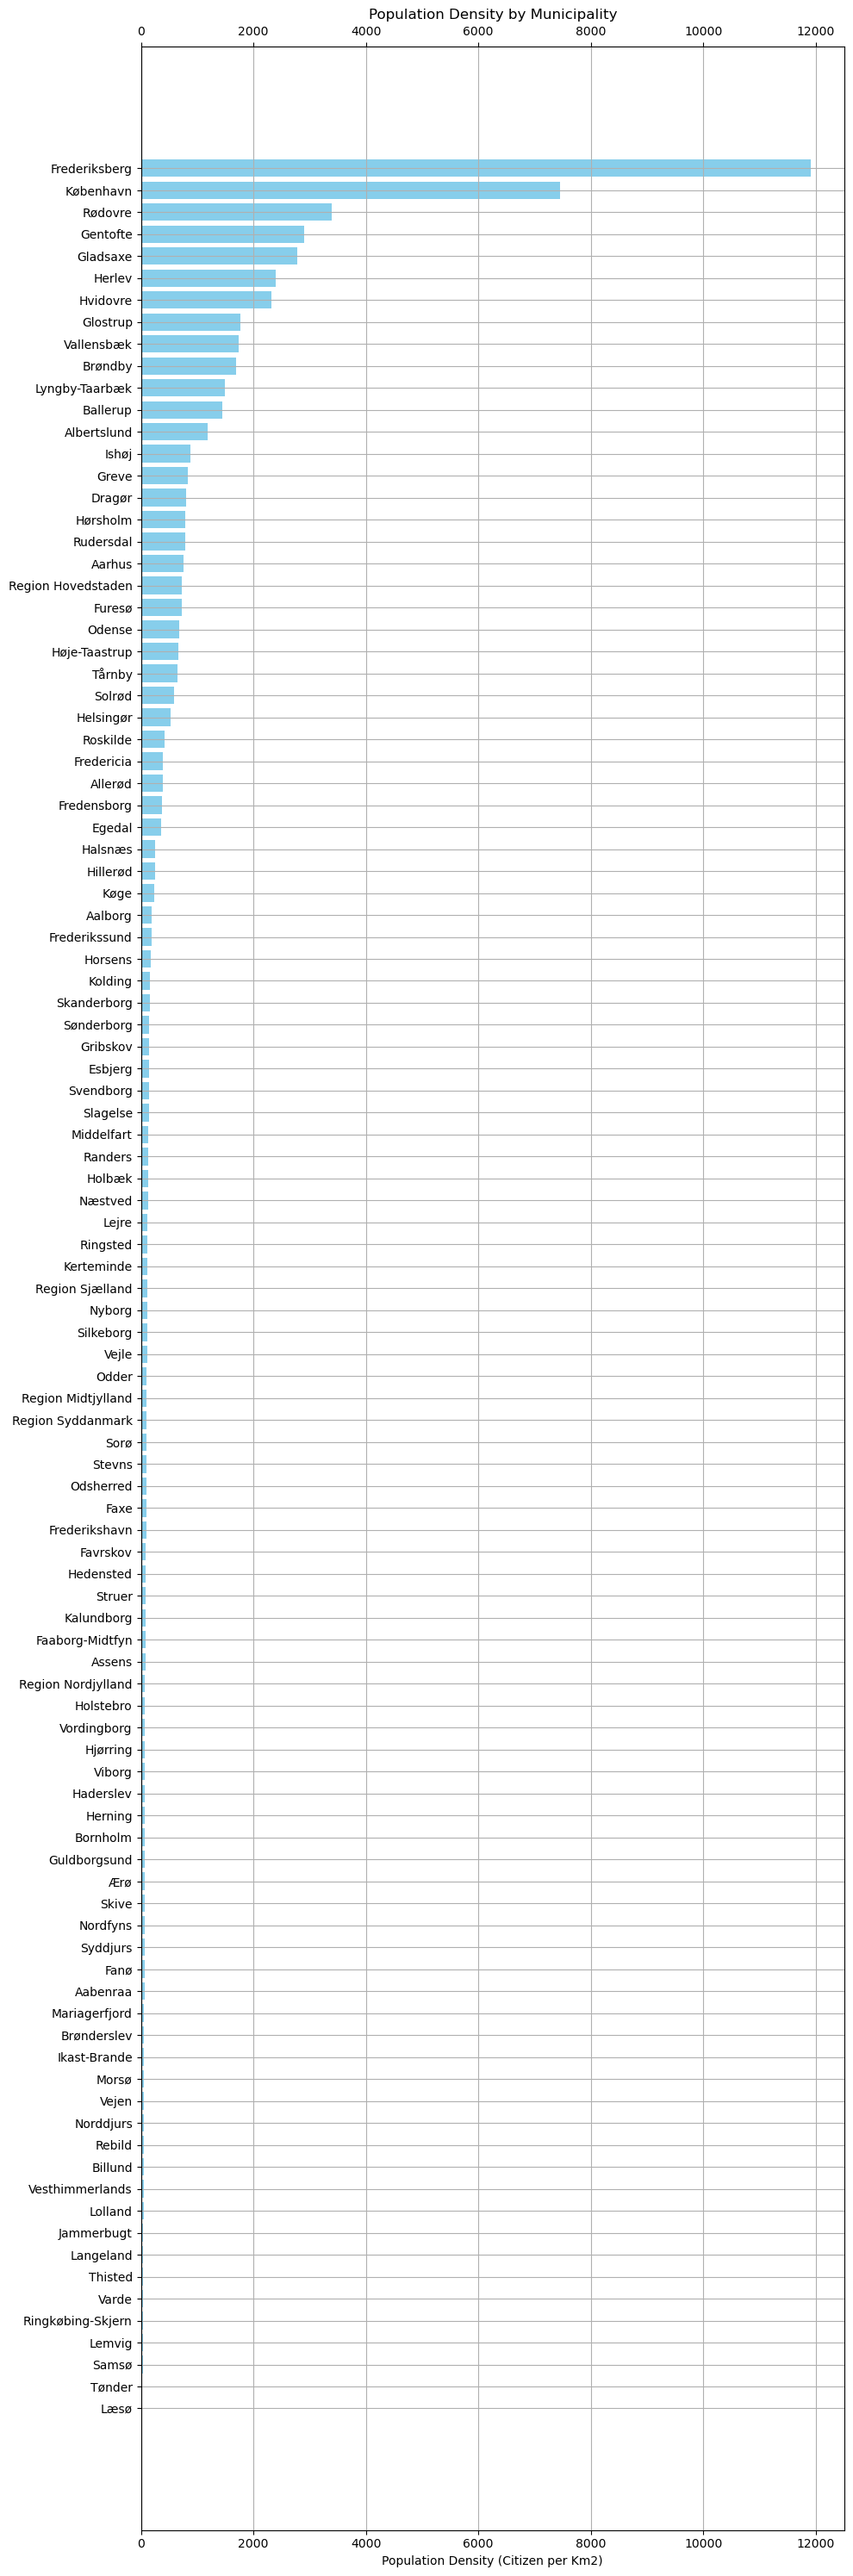

In [40]:
# Ensure the data is sorted by population density for better visualization
sorted_PopulationDensitydata = PopulationDensity.sort_values('PopulationDensity', ascending=True)

# Creating a horizontal bar chart
plt.figure(figsize=(10, 30))  # Increased figuresize to avoid overlap
plt.barh(sorted_PopulationDensitydata['Municipality'], sorted_PopulationDensitydata['PopulationDensity'], color='skyblue')
plt.xlabel('Population Density (Citizen per Km2)')
plt.title('Population Density by Municipality')
plt.grid(True)

# Displaying x axis parameters on both top and bottom
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=True)

# Display all municipality names along the y-axis
plt.yticks(sorted_PopulationDensitydata['Municipality'])

plt.tight_layout()  # Adjust layout to make all labels fit
plt.show()

This chart shows how densely populated different municipalities in Denmark are, presenting them in sorted order.

### What is the crime rate in each municipality?

In [41]:
# Mergin dataframes
CrimePopulationData = pd.merge(ReportedCrimes, PopulationDensity, on='Municipality')

#Dropping columns irelevant for the function
CrimePopulationData = CrimePopulationData.drop(columns=['PopulationDensity','Km2'])

# Display the first few rows of the DataFrame 
display(CrimePopulationData.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", CrimePopulationData.shape)

# Show basic statistics of the DataFrame's numerical data
display(CrimePopulationData.describe())

,Municipality,Number,Number of Citizen
0,Region Hovedstaden,45655,1866088
1,København,22625,643613
2,Frederiksberg,2016,103782
3,Dragør,133,14616
4,Tårnby,1943,42664



The shape of the DataFrame is: (103, 3)


,Number,Number of Citizen
count,103.000000,1.030000e+02
mean,2096.854369,1.139294e+05
std,5716.775509,2.694514e+05
min,6.000000,1.795000e+03
25%,448.000000,3.176000e+04
50%,629.000000,4.509700e+04
75%,1173.500000,6.391900e+04
max,45655.000000,1.866088e+06


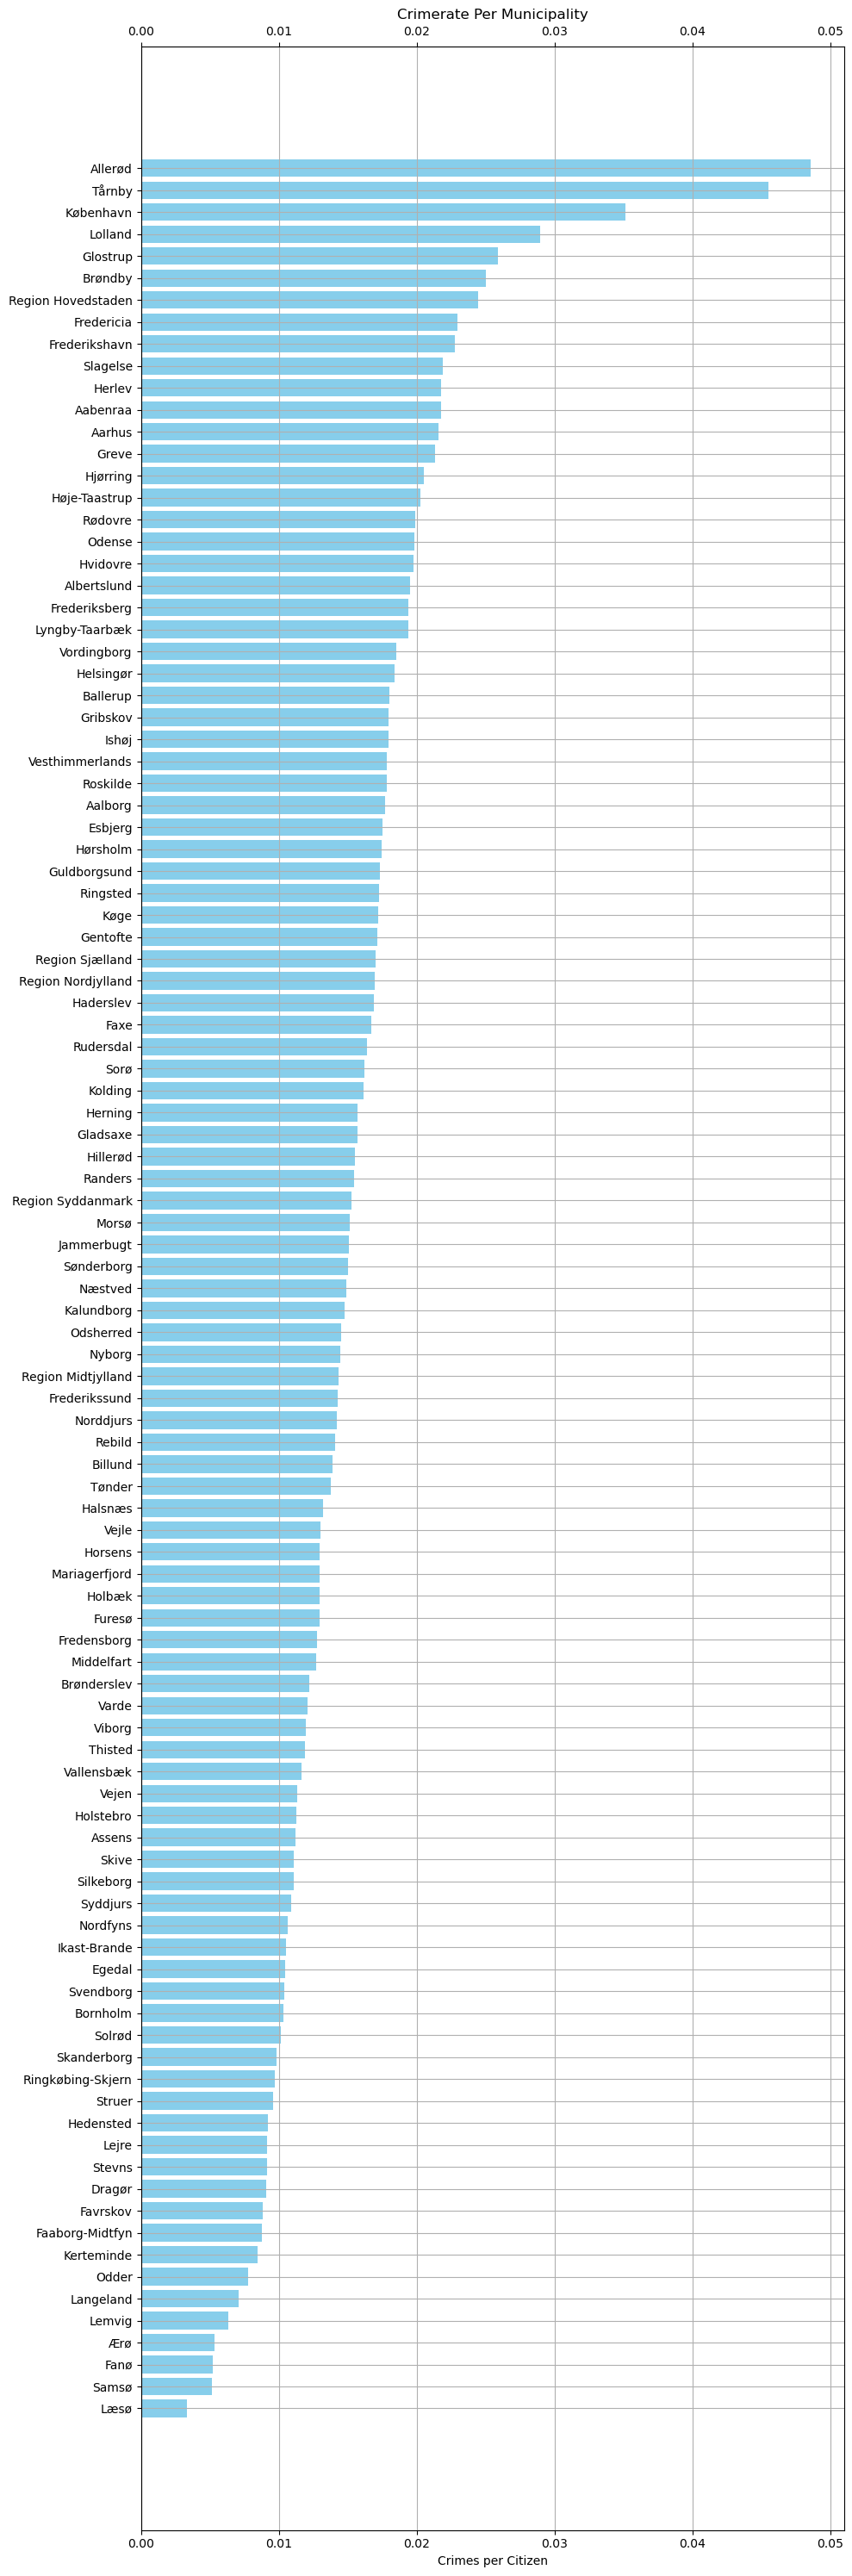

In [42]:
# Calculate number of crimes per citizen
CrimePopulationData['Crime rate'] = CrimePopulationData['Number'] / CrimePopulationData['Number of Citizen']

# Ensure the data is sorted by population density for better visualization
sorted_CrimePopulationData = CrimePopulationData.sort_values('Crime rate', ascending=True)

# Creating a horizontal bar chart
plt.figure(figsize=(10, 30))  # Increased figuresize to avoid overlap
plt.barh(sorted_CrimePopulationData['Municipality'], sorted_CrimePopulationData['Crime rate'], color='skyblue')
plt.xlabel('Crimes per Citizen')
plt.title('Crimerate Per Municipality')
plt.grid(True)

# Displaying x axis parameters on both top and bottom
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=True)

# Display all municipality names along the y-axis
plt.yticks(sorted_CrimePopulationData['Municipality'])

plt.tight_layout()  # Adjust layout to make all labels fit
plt.show()

This chart shows the number of crimes per citizen across different municipalities in Denmark and presents them in sorted order.

#### What is the Drug abuse rate in each Municipality

In [43]:
# Mergin dataframes
DrugAbuseRate = pd.merge(DrugTreatmentCases, PopulationPerMunicipality, on='Municipality')

# Check if there are any zero values, and dropping if there are
DrugAbuseRate = DrugAbuseRate[DrugAbuseRate['Citizens receiving treatment'] > 0]
DrugAbuseRate = DrugAbuseRate[DrugAbuseRate['Number of Citizen'] > 0]

# Display the first few rows of the DataFrame 
display(DrugAbuseRate.head())

# Adding a little space
print()
# Show the shape of the DataFrame
print("The shape of the DataFrame is:", DrugAbuseRate.shape)

# Show basic statistics of the DataFrame's numerical data
display(DrugAbuseRate.describe())

,Municipality,Citizens receiving treatment,Number of Citizen
0,København,2190,643613
1,Frederiksberg,276,103782
2,Dragør,27,14616
3,Tårnby,144,42664
4,Albertslund,135,27411



The shape of the DataFrame is: (90, 3)


,Citizens receiving treatment,Number of Citizen
count,90.000000,90.000000
mean,171.666667,57286.844444
std,253.604532,71130.490665
min,8.000000,3436.000000
25%,67.250000,30844.750000
50%,113.000000,42902.000000
75%,183.750000,58970.750000
max,2190.000000,643613.000000


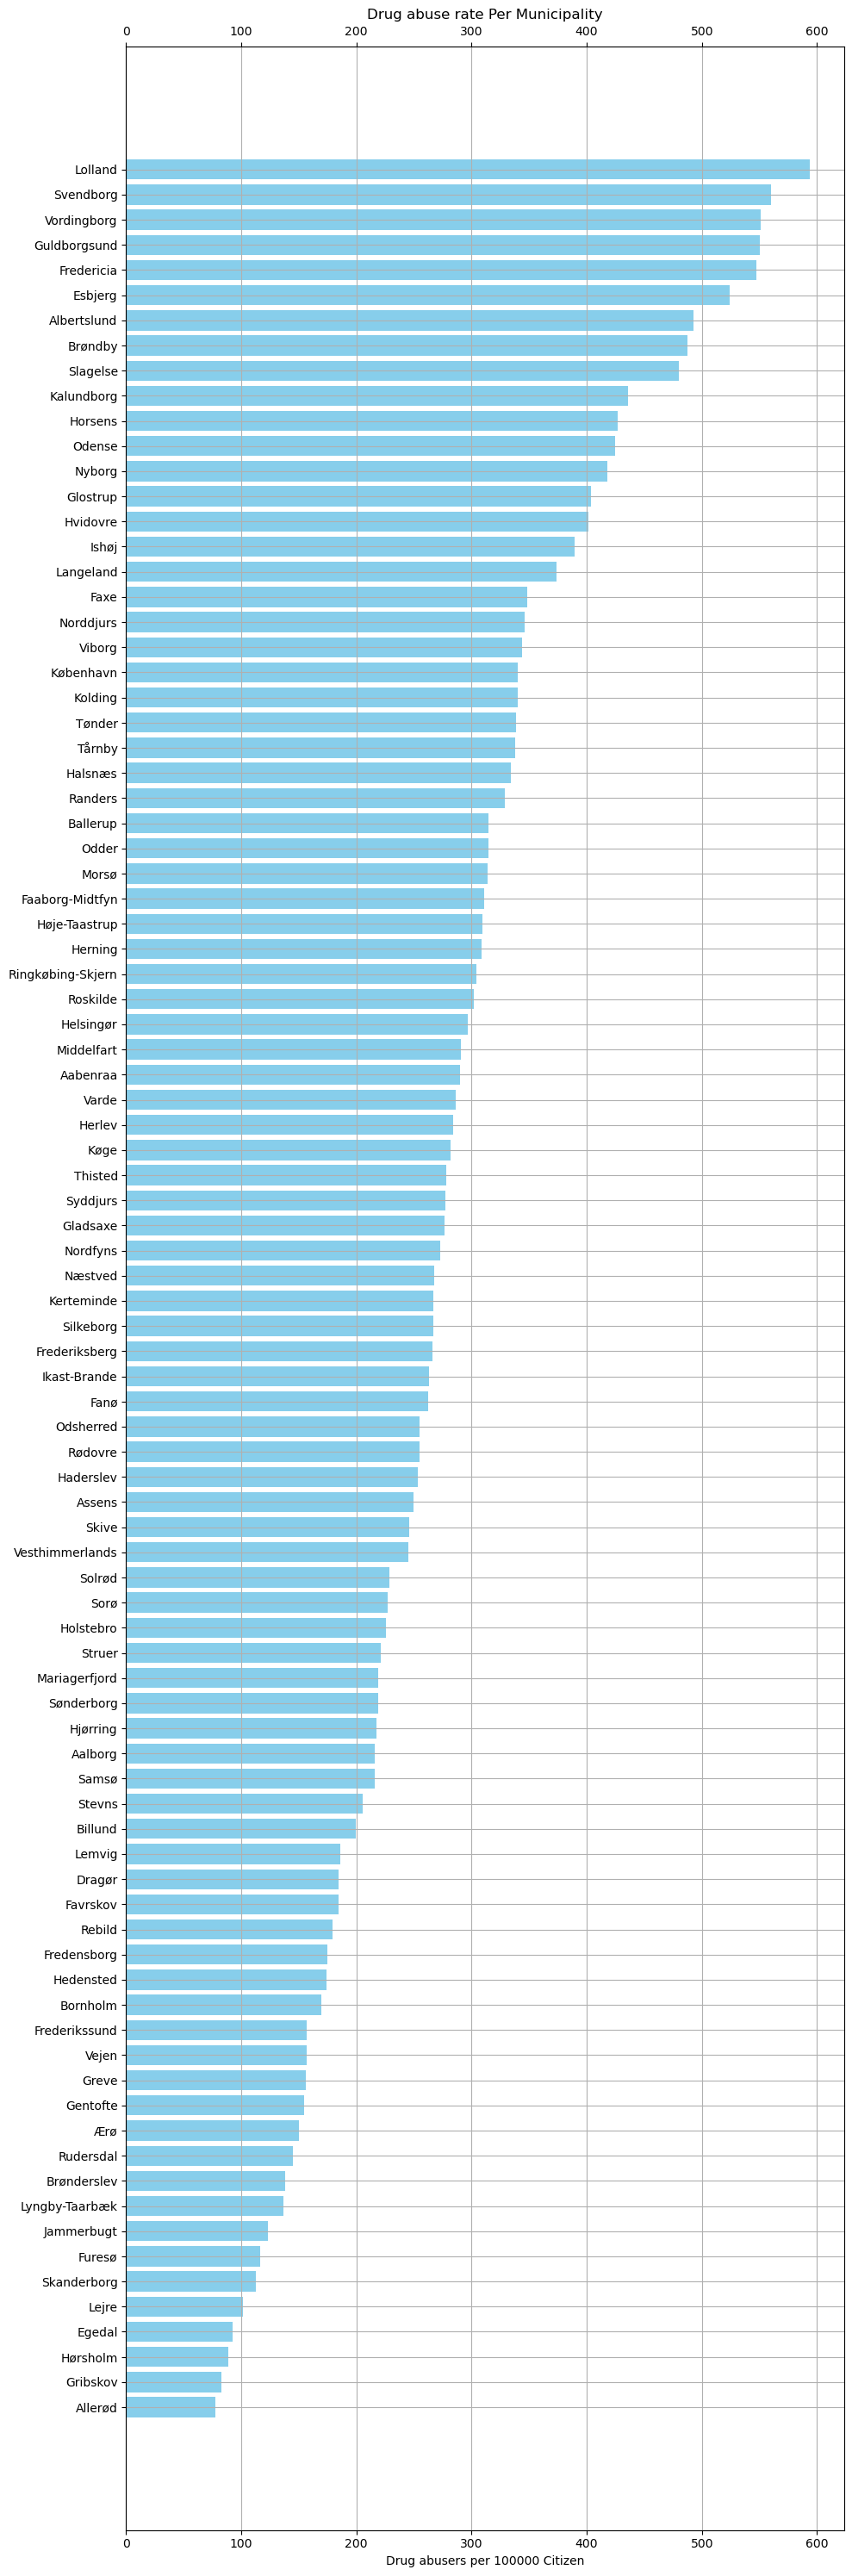

In [44]:
# Calculate drug abuse rate
DrugAbuseRate['Drug Abuse Rate'] = DrugAbuseRate['Citizens receiving treatment'] / DrugAbuseRate['Number of Citizen'] * 100000

# Ensure the data is sorted by population density for better visualization
sorted_DrugAbuseRate = DrugAbuseRate.sort_values('Drug Abuse Rate', ascending=True)

# Creating a horizontal bar chart
plt.figure(figsize=(10, 30))  # Increased figuresize to avoid overlap
plt.barh(sorted_DrugAbuseRate['Municipality'], sorted_DrugAbuseRate['Drug Abuse Rate'], color='skyblue')
plt.xlabel('Drug abusers per 100000 Citizen')
plt.title('Drug abuse rate Per Municipality')
plt.grid(True)

# Displaying x axis parameters on both top and bottom
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=True)

# Display all municipality names along the y-axis
plt.yticks(sorted_DrugAbuseRate['Municipality'])

plt.tight_layout()  # Adjust layout to make all labels fit
plt.show()

This chart shows the number of drug abusers per 100.000 citizens across different municipalities in Denmark. The chart is in sorted order.

### What is the relation between Population Density, Nature Area per Capita, Drug Abuse, and Crime Rate?

Pre Prossessing the data

In [45]:
# Mergin multiple data frames
WellBeingPerMunicipality = pd.merge(DrugAbuseRate, PopulationDensity, on='Municipality')

# Calculating Drug Abuse Rate
WellBeingPerMunicipality['Drug Abuse Rate'] = WellBeingPerMunicipality['Citizens receiving treatment'] / WellBeingPerMunicipality['Number of Citizen_x']

# Calculating Population Density
#WellBeingPerMunicipality['Population Density'] = WellBeingPerMunicipality['Number of Citizen_y'] / WellBeingPerMunicipality['Km2']

# Dropping irelevant columns after calculations
WellBeingPerMunicipality = WellBeingPerMunicipality.drop(columns=['Number of Citizen_x','Number of Citizen_y','Citizens receiving treatment',])

# Preprocessing Nature Area, by summing the area of all nature types per municiplaity.
aggregated_NatureAreas = NatureAreaPerCapita.groupby('Municipality')['m2 per citizen'].sum().reset_index()

# Addind aggregated_NatureAreas to the dataset
WellBeingPerMunicipality = pd.merge(WellBeingPerMunicipality, aggregated_NatureAreas, on='Municipality')

# Addind CrimePopulationData to the dataset
WellBeingPerMunicipality = pd.merge(WellBeingPerMunicipality, CrimePopulationData, on='Municipality')

# Calculating Crime Rate
#WellBeingPerMunicipality['Crime Rate'] = WellBeingPerMunicipality['Number'] / WellBeingPerMunicipality['Number of Citizen']

# Dropping columns irelevant for the function
WellBeingPerMunicipality = WellBeingPerMunicipality.drop(columns=['Number','Number of Citizen','Km2'])

#DrugAbuseRate = DrugAbuseRate[DrugAbuseRate['Citizens receiving treatment'] > 0]
#DrugAbuseRate = DrugAbuseRate[DrugAbuseRate['Number of Citizen'] > 0]

print(WellBeingPerMunicipality)

       Municipality  Drug Abuse Rate  PopulationDensity  m2 per citizen  \
0         København         0.003403        7449.224537            57.9   
1     Frederiksberg         0.002659       11915.269805            13.6   
2            Dragør         0.001847         800.438116          1239.5   
3            Tårnby         0.003375         645.446293          1757.2   
4       Albertslund         0.004925        1182.018111           617.2   
..              ...              ...                ...             ...   
85            Morsø         0.003141          54.730781         30476.9   
86           Rebild         0.001795          49.315906         34768.3   
87          Thisted         0.002783          40.149928         40816.3   
88  Vesthimmerlands         0.002449          47.210278         34779.6   
89          Aalborg         0.002162         194.418408          8472.4   

    Crime rate  
0     0.035153  
1     0.019425  
2     0.009100  
3     0.045542  
4     0.019518

In [46]:
# Normalizing data to make visualisation possible
scaler = MinMaxScaler()

# Extract the columns to be scaled
data_to_scale = WellBeingPerMunicipality.drop('Municipality', axis=1)

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled data
ScaledWellBeingData = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# Add the 'Municipality' column back to the scaled DataFrame
ScaledWellBeingData.insert(0, 'Municipality', WellBeingPerMunicipality['Municipality'])

print(ScaledWellBeingData)

       Municipality  Drug Abuse Rate  PopulationDensity  m2 per citizen  \
0         København         0.509037           0.624277        0.000798   
1     Frederiksberg         0.365178           1.000000        0.000000   
2            Dragør         0.207986           0.064923        0.022071   
3            Tårnby         0.503723           0.051884        0.031391   
4       Albertslund         0.803699           0.097025        0.010867   
..              ...              ...                ...             ...   
85            Morsø         0.458460           0.002187        0.548452   
86           Rebild         0.197895           0.001732        0.625712   
87          Thisted         0.389146           0.000961        0.734599   
88  Vesthimmerlands         0.324441           0.001555        0.625916   
89          Aalborg         0.268857           0.013939        0.152290   

    Crime rate  
0     0.691227  
1     0.329179  
2     0.091484  
3     0.930373  
4     0.331305

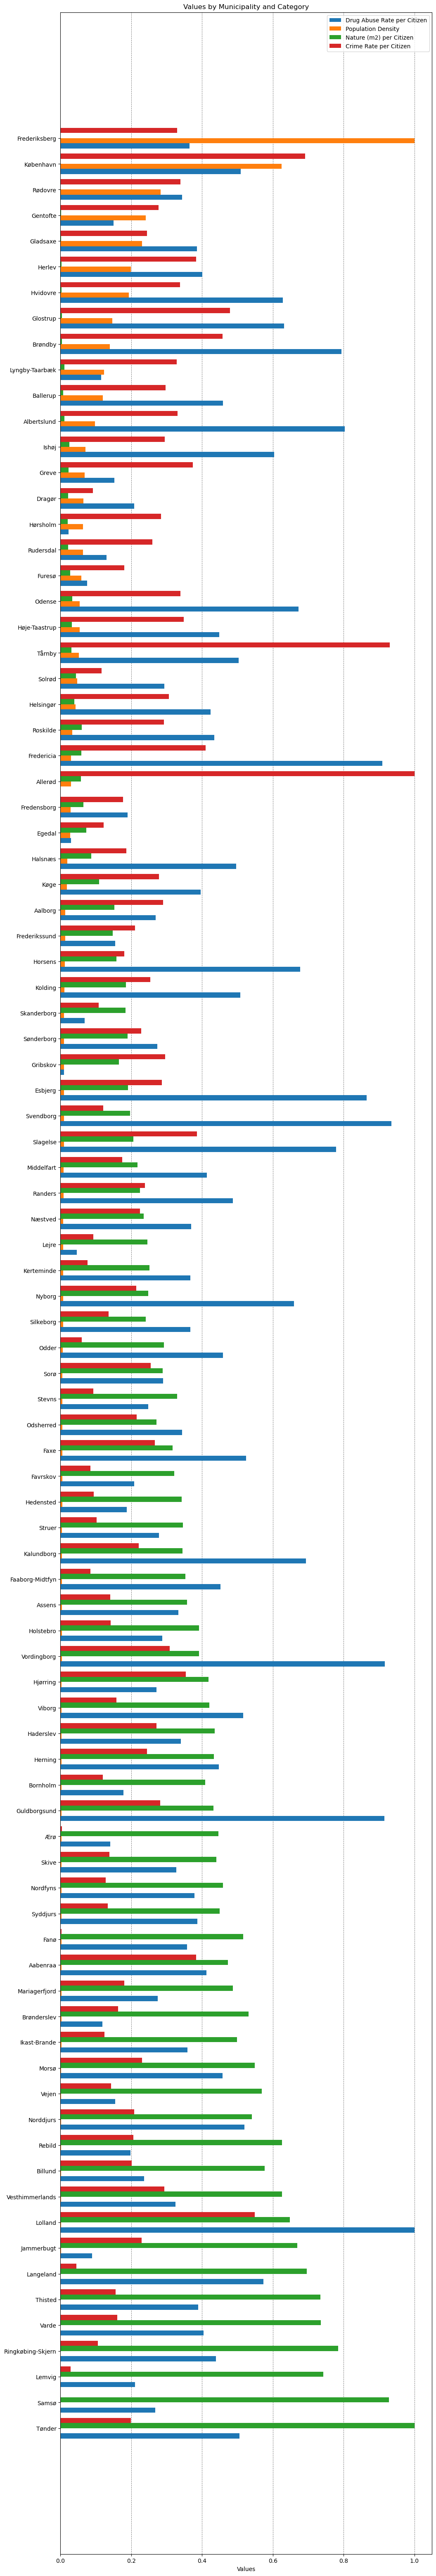

In [47]:
# Ensure the data is sorted by population density for better visualization
sorted_WellBeingPerMunicipality = ScaledWellBeingData.sort_values('PopulationDensity', ascending=True)

# Get the sorted list of municipalities
municipalities = sorted_WellBeingPerMunicipality['Municipality']
# Re-create the indices for the sorted municipalities
indices = np.arange(len(municipalities))

fig, ax = plt.subplots(figsize=(15, 80))  # Adjusted for better display in horizontal layout

# Create horizontal bars for each variable
width = 0.2  # the width of the bars
bars1 = ax.barh(indices - width*1.5, sorted_WellBeingPerMunicipality['Drug Abuse Rate'], width, label='Drug Abuse Rate per Citizen')
bars2 = ax.barh(indices - width/2, sorted_WellBeingPerMunicipality['PopulationDensity'], width, label='Population Density')
bars3 = ax.barh(indices + width/2, sorted_WellBeingPerMunicipality['m2 per citizen'], width, label='Nature (m2) per Citizen')
bars4 = ax.barh(indices + width*1.5, sorted_WellBeingPerMunicipality['Crime rate'], width, label='Crime Rate per Citizen')

# Add some text for labels, title, and custom y-axis tick labels, etc.
ax.set_xlabel('Values')
ax.set_title('Values by Municipality and Category')
ax.set_yticks(indices)
ax.set_yticklabels(municipalities)
ax.legend(loc='best')

# Customize grid lines
ax.set_axisbelow(True)  # Ensure grid lines are below the bars
ax.yaxis.grid(False)  # Turn off the horizontal grid lines
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.7)  # Enable vertical grid lines with customization
ax.set_xticks(np.arange(0, 1.1, 0.2))  # Set x-ticks to be at 0.0, 0.2, ..., 1.0

# Make space for the y-axis labels
plt.subplots_adjust(left=0.3)  # Adjust left margin to make space for municipality labels

plt.show()


The plot has been sorted by increasing nature area to see if there was a clear connection between the increase in the amount of nature in a municipality and the other three values. The only clear relation observed was between population density and the amount of nature.

## 4. Data Modelling
We want to build a statistical model using regression analysis to find what correlations there might be between the previously discussed datasets. Thereby, we can gauge how changes in the values can potentially impact one another.

We want to build a model that is capable of analyzing the crime rate.

### 4.1. Feature Selection
We want to work with the features just used in the previous question about the relation between drug abuse, crime rate, population density, and available nature per municipality.

In [54]:
# Doing a simple copy of the dataset previous scaled dataset since it already fits the pourpess
data = ScaledWellBeingData.copy()

print(data)

       Municipality  Drug Abuse Rate  PopulationDensity  m2 per citizen  \
0         København         0.509037           0.624277        0.000798   
1     Frederiksberg         0.365178           1.000000        0.000000   
2            Dragør         0.207986           0.064923        0.022071   
3            Tårnby         0.503723           0.051884        0.031391   
4       Albertslund         0.803699           0.097025        0.010867   
..              ...              ...                ...             ...   
85            Morsø         0.458460           0.002187        0.548452   
86           Rebild         0.197895           0.001732        0.625712   
87          Thisted         0.389146           0.000961        0.734599   
88  Vesthimmerlands         0.324441           0.001555        0.625916   
89          Aalborg         0.268857           0.013939        0.152290   

    Crime rate  
0     0.691227  
1     0.329179  
2     0.091484  
3     0.930373  
4     0.331305

### 4.2 Model Construction and Validation
We want to work with two different regression models: the Ordinary Least Squares model and the Robust Linear Model. By using both models, we wish to gain insight into the influence of outliers.

### Crime Model

In [55]:
# Before building the model we observe if there are any significant differences in MSE
# Thereby we aim to understand if there are any outliers that have significantly influence on the module

# Asigning data to x and y.
X = data[['m2 per citizen', 'PopulationDensity', 'Drug Abuse Rate']]
y = data['Crime rate']
X = sm.add_constant(X)  # adding a constant for the intercept

kf = KFold(n_splits=10, shuffle=True, random_state=1)  # 10-fold cross-validation

ols_mse = []
rlm_mse = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # OLS Model
    CrimeOlsModel = sm.OLS(y_train, X_train).fit()
    y_pred_ols = CrimeOlsModel.predict(X_test)
    ols_mse.append(mean_squared_error(y_test, y_pred_ols))
    
    # RLM Model
    CrimeRlmModel = sm.RLM(y_train, X_train).fit()
    y_pred_rlm = CrimeRlmModel.predict(X_test)
    rlm_mse.append(mean_squared_error(y_test, y_pred_rlm))

# Calculate average MSE across all folds
print("Average MSE for OLS:", np.mean(ols_mse))
print("Average MSE for RLM:", np.mean(rlm_mse))


Average MSE for OLS: 0.024338353351088866
Average MSE for RLM: 0.02443237852195506


There is little difference between the average MSE for both models. Therefore, we choose to use the OLS model for its simplicity.

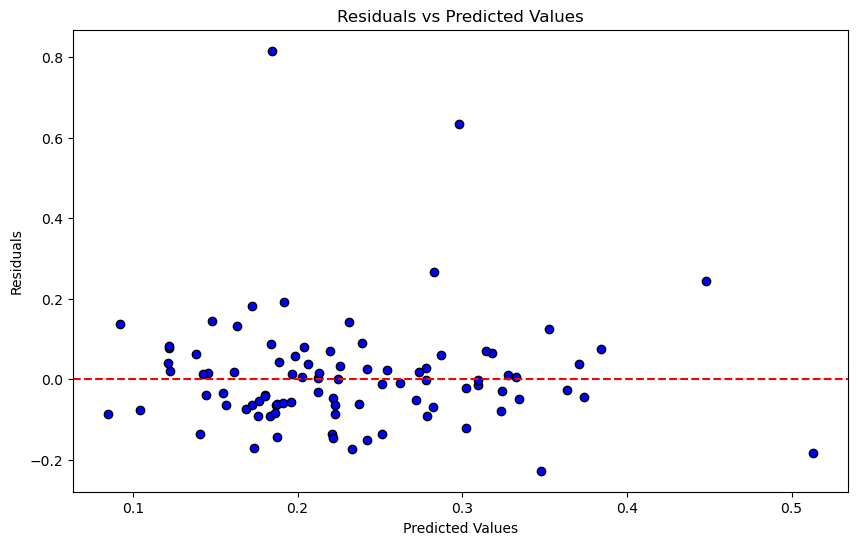

                            OLS Regression Results                            
Dep. Variable:             Crime rate   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     12.09
Date:                Wed, 01 May 2024   Prob (F-statistic):           1.45e-06
Time:                        22:07:17   Log-Likelihood:                 58.060
No. Observations:                  81   AIC:                            -108.1
Df Residuals:                      77   BIC:                            -98.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1865      0.03

In [56]:
# Predicted values
predicted_values = CrimeOlsModel.predict(X)

# Residuals
residuals = y - predicted_values

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Print out the statistics
print(CrimeOlsModel.summary()) 

The R value of the OLS crime model is very low. But we still believe that the model is useful. Crime rates are a difficult aspect to quantify, and we value having some descriptive ability. The plot does not indicate any systematic curve. Therefore, we can assume that the linear model is a reasonable fit.
We will try to transform the data to gauge if any improvement can be made.

In [57]:
# Log transformation

data['log_m2 per citizen'] = np.log(data['m2 per citizen'] + 1)  # Adding 1 to avoid log(0)
data['log_PopulationDensity'] = np.log(data['PopulationDensity'] + 1)  # Adding 1 to avoid log(0)
data['log_Drug Abuse Rate'] = np.log(data['Drug Abuse Rate'] + 1)  # Adding 1 to avoid log(0)
data['log_Crime rate'] = np.log(data['Crime rate'] + 1)  # Adding 1 to avoid log(0)

X = data[['log_m2 per citizen', 'log_PopulationDensity', 'log_Drug Abuse Rate']]  # Predictor variables
y = data['log_Crime rate']  # Response variable

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit a robust linear regression model
CrimeModelLog = sm.OLS(y, X).fit()

# Print out the statistics
print(CrimeModelLog.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Crime rate   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     11.65
Date:                Wed, 01 May 2024   Prob (F-statistic):           1.76e-06
Time:                        22:07:23   Log-Likelihood:                 78.976
No. Observations:                  90   AIC:                            -150.0
Df Residuals:                      86   BIC:                            -140.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [58]:
# Square Root transformation

data['sqrt_m2 per citizen'] = np.sqrt(data['m2 per citizen'])  # Adding 1 to avoid log(0)
data['sqrt_PopulationDensity'] = np.sqrt(data['PopulationDensity'])  # Adding 1 to avoid log(0)
data['sqrt_Drug Abuse Rate'] = np.sqrt(data['Drug Abuse Rate'])  # Adding 1 to avoid log(0)
data['sqrt_Crime rate'] = np.sqrt(data['Crime rate'])  # Adding 1 to avoid log(0)

X = data[['sqrt_m2 per citizen', 'sqrt_PopulationDensity', 'sqrt_Drug Abuse Rate']]  # Predictor variables
y = data['sqrt_Crime rate']  # Response variable

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit a robust linear regression model
CrimeModelSqrt = sm.OLS(y, X).fit()

# Print out the statistics
print(CrimeModelSqrt.summary())

                            OLS Regression Results                            
Dep. Variable:        sqrt_Crime rate   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     12.19
Date:                Wed, 01 May 2024   Prob (F-statistic):           1.01e-06
Time:                        22:07:24   Log-Likelihood:                 52.725
No. Observations:                  90   AIC:                            -97.45
Df Residuals:                      86   BIC:                            -87.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [59]:
# Inverse transformation

data['inv_m2 per citizen'] = 1 / (data['m2 per citizen'] + 1)  # Adding 1 to avoid division by zero
data['inv_PopulationDensity'] = 1 / (data['PopulationDensity'] + 1)  # Adding 1 to avoid division by zero 
data['inv_Drug Abuse Rate'] = 1 / (data['Drug Abuse Rate'] + 1)  # Adding 1 to avoid division by zero 
data['inv_Crime rate'] = 1 / (data['Crime rate'] + 1)  # Adding 1 to avoid division by zero 

X = data[['inv_m2 per citizen', 'inv_PopulationDensity', 'inv_Drug Abuse Rate']]  # Predictor variables
y = data['inv_Crime rate']  # Response variable

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit a robust linear regression model
CrimeModelInv = sm.OLS(y, X).fit()

# Print out the statistics
print(CrimeModelInv.summary())

                            OLS Regression Results                            
Dep. Variable:         inv_Crime rate   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     13.28
Date:                Wed, 01 May 2024   Prob (F-statistic):           3.36e-07
Time:                        22:07:24   Log-Likelihood:                 105.20
No. Observations:                  90   AIC:                            -202.4
Df Residuals:                      86   BIC:                            -192.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.71

### 4.3 Model Application and Performance Evaluation 
After having evaluated the regression model and the different value transformations, we would like to delve into the specifics of the Crime OLS Model.

In [105]:
print(CrimeOlsModel.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime rate   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     12.09
Date:                Wed, 01 May 2024   Prob (F-statistic):           1.45e-06
Time:                        14:40:17   Log-Likelihood:                 58.060
No. Observations:                  81   AIC:                            -108.1
Df Residuals:                      77   BIC:                            -98.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1865      0.03

By looking at the coefficient of the summary, we can observe some relationships between the data.
With every extra square meter of nature per citizen, the crime rate decreases by 0.169 units.
With every unit increase in population density, the crime rate increases by 0.251 units.
With every unit increase of the Drug Abuse Rate, the crime rate increases by 0.206 units.

While the R value is 0.32, indicating that 32% of the variability in crime can be explained by the model, we still believe the model to be able to partially explain the crime rate. 32% seems high when we take into consideration that crime rate is a complex phenomenon, and we have used relatively few variables to predict it.

#### Testing the OLS Model against real data
For the last part of our model evaluation, we are going to use the same datasets from a different year (2021), to see how well the model performs on real data.
First, we need to prepare the test data:

In [75]:
# Calculating Drug Abuse Rate in test data
# Mergin dataframes
TestDrugAbuseRate = pd.merge(TestDrugTreatmentCases, TestPopulationPerMunicipality, on='Municipality')

# Check if there are any zero values, and dropping if there are
TestDrugAbuseRate = TestDrugAbuseRate[TestDrugAbuseRate['Citizens receiving treatment'] > 0]
TestDrugAbuseRate = TestDrugAbuseRate[TestDrugAbuseRate['Number of Citizen'] > 0]

# Calculate drug abuse rate
TestDrugAbuseRate['Drug Abuse Rate'] = TestDrugAbuseRate['Citizens receiving treatment'] / TestDrugAbuseRate['Number of Citizen'] * 100000

In [76]:
# Calculating Population Density
# Mergin dataframes
TestPopulationDensity = pd.merge(TestPopulationPerMunicipality, TestTotalMunicipalityArea, on='Municipality')

# Calculate drug abuse rate
TestPopulationDensity['PopulationDensity'] = TestPopulationDensity['Number of Citizen'] / TestPopulationDensity['Km2']

# Drop rows where there are NaNs in 'Km2' or 'Number of Citizen'
PopulationDensity = PopulationDensity.dropna(subset=['Km2', 'Number of Citizen'])
PopulationDensity = PopulationDensity[PopulationDensity['Km2'] > 0]
PopulationDensity = PopulationDensity[PopulationDensity['Number of Citizen'] > 0]

In [82]:
# Mergin multiple data frames
TestWellBeingPerMunicipality = pd.merge(TestDrugAbuseRate, TestPopulationDensity, on='Municipality')

# Calculating Drug Abuse Rate
TestWellBeingPerMunicipality['Drug Abuse Rate'] = TestWellBeingPerMunicipality['Citizens receiving treatment'] / TestWellBeingPerMunicipality['Number of Citizen_x']

# Preprocessing Nature Area, by summing the area of all nature types per municiplaity.
Testaggregated_NatureAreas = TestNatureAreaPerCapita.groupby('Municipality')['m2 per citizen'].sum().reset_index()

# Addind aggregated_NatureAreas to the dataset
TestWellBeingPerMunicipality = pd.merge(TestWellBeingPerMunicipality, Testaggregated_NatureAreas, on='Municipality')

# Addind CrimePopulationData to the dataset
TestWellBeingPerMunicipality = pd.merge(TestWellBeingPerMunicipality, TestReportedCrimes, on='Municipality')

# Calculating Crime Rate
TestWellBeingPerMunicipality['Crime Rate'] = TestWellBeingPerMunicipality['Number'] / TestWellBeingPerMunicipality['Number of Citizen_x']

# Dropping columns irelevant for the function
TestWellBeingPerMunicipality = TestWellBeingPerMunicipality.drop(columns=['Km2','Number of Citizen_x','Number of Citizen_y','Citizens receiving treatment','Number']) 


print(TestWellBeingPerMunicipality)

       Municipality  Drug Abuse Rate  PopulationDensity  m2 per citizen  \
0         København         0.003845        7143.318535            52.9   
1     Frederiksberg         0.003594       11928.965517            13.6   
2            Dragør         0.001505         798.688525          1201.1   
3            Tårnby         0.004641         645.446293          1759.7   
4          Ballerup         0.004304        1453.067847           434.2   
..              ...              ...                ...             ...   
91            Morsø         0.003091          54.720327         31289.5   
92           Rebild         0.002415          49.312731         33154.5   
93          Thisted         0.003294          40.215465         41436.6   
94  Vesthimmerlands         0.004045          47.209665         35486.5   
95          Aalborg         0.003776         194.403024          8062.6   

    Crime Rate  
0     0.025997  
1     0.016159  
2     0.008689  
3     0.020579  
4     0.015733

In [101]:
# Normalizing test data to make it fit the training data
scaler = MinMaxScaler()

# Extract the columns to be scaled
data_to_scale = TestWellBeingPerMunicipality.drop('Municipality', axis=1)

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled data
TestScaledWellBeingData = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# Add the 'Municipality' column back to the scaled DataFrame
TestScaledWellBeingData.insert(0, 'Municipality', TestWellBeingPerMunicipality['Municipality'])

print(TestScaledWellBeingData)

       Municipality  Drug Abuse Rate  PopulationDensity  m2 per citizen  \
0         København         0.364246           0.597853        0.000689   
1     Frederiksberg         0.329148           1.000000        0.000000   
2            Dragør         0.037529           0.064701        0.020829   
3            Tårnby         0.475294           0.051824        0.030626   
4          Ballerup         0.428228           0.119690        0.007377   
..              ...              ...                ...             ...   
91            Morsø         0.258986           0.002184        0.548573   
92           Rebild         0.164584           0.001730        0.581285   
93          Thisted         0.287189           0.000965        0.726551   
94  Vesthimmerlands         0.392087           0.001553        0.622187   
95          Aalborg         0.354593           0.013922        0.141178   

    Crime Rate  
0     0.905846  
1     0.526652  
2     0.238742  
3     0.697034  
4     0.510243

In [113]:
# Assigning test data
X_test = TestScaledWellBeingData[['m2 per citizen', 'PopulationDensity', 'Drug Abuse Rate']]
y_test = TestScaledWellBeingData['Crime Rate']
X_test = sm.add_constant(X_test)

# Predicting with OLS Model
y_pred_ols = CrimeOlsModel.predict(X_test)

# Calculate MSE for OLS and RLM
mse_ols_test = mean_squared_error(y_test, y_pred_ols)
print("Test MSE for OLS:", mse_ols_test)

Test MSE for OLS: 0.03999532209982823


### 4.4 Visualize and Analyze Your Results/Findings from Data Modelling 

In [103]:
# Assuring that both test and prediction are the same length
print("Length of y_test:", len(y_test))
print("Length of y_pred_ols:", len(y_pred_ols)) 

Length of y_test: 96
Length of y_pred_ols: 96


In [104]:
# Check for any null values
print("NaN in y_test:", y_test.isnull().any())
print("NaN in y_pred_ols:", y_pred_ols.isnull().any()) 

NaN in y_test: False
NaN in y_pred_ols: False


Test MSE for OLS: 0.03999532209982823


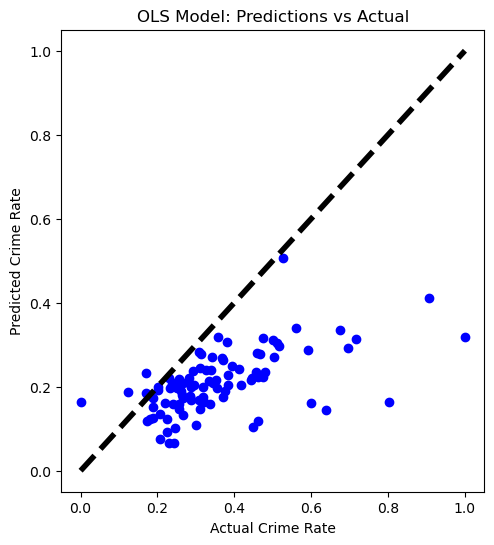

In [114]:
plt.figure(figsize=(12, 6))

# Plot for OLS predictions
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_ols, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('OLS Model: Predictions vs Actual')
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate') 

# Evaluate the model
print("Test MSE for OLS:", mse_ols_test)

plt.show()

Looking at the plot, we can see that the points are mostly clustered at the lower end of the scale. This might have to do with the model being more capable of predicting lower crime rates. The data distribution around the dashed line shows some signs of underfitting, since the residuals indicate that the model is systematically underestimating values. It seems like the model lacks the complexity to capture the key patterns of the data.

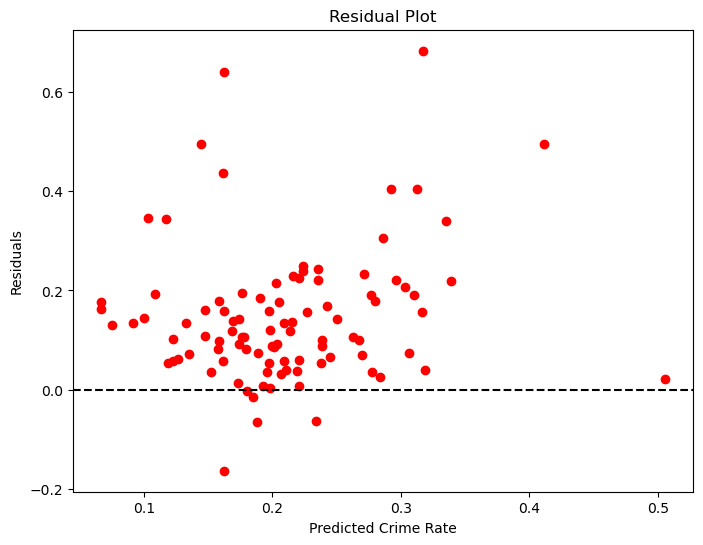

In [118]:
# Calculate residuals
residuals = y_test - y_pred_ols

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ols, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Crime Rate')
plt.ylabel('Residuals')
plt.show()

In the residual plot, we see a somewhat different result than the previous residual plot. This might have to do with the different test data being used. Multiple outliers can be seen in the plot, which might influence the model's coefficients. The uneven spread of residuals along the x axis might indicate that the model does not equally capture the data across all levels of the dependent variable. 

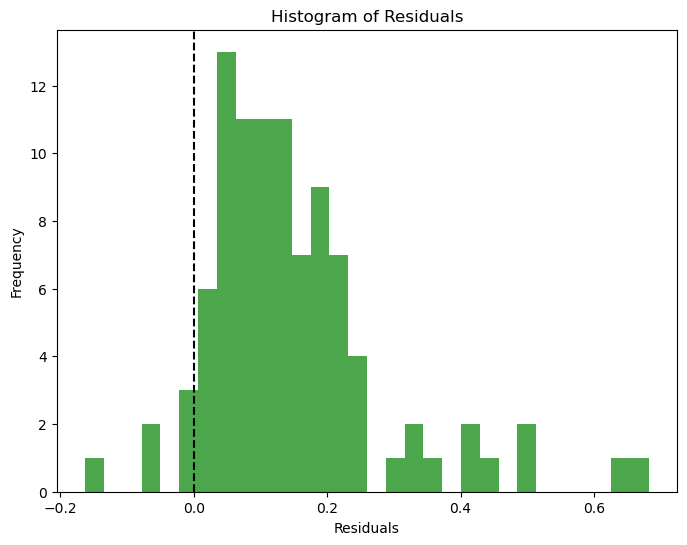

In [123]:
# Calculate residuals
residuals = y_test - y_pred_ols

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The histogram shows a non-normal distribution, showing a dominance of residuals in the range of 0.0 and 0.2. This does again point towards some outliers influencing the model's predictions. This can lead to incorrect conclusions about the significance of predictors.

### 4.5 Different Model Test
We want to observe how different models perform with the given dataset.

### Polynomial Regression
We build a polynomial model to gauge whether a linear or polynomial regression model is the best fit for the data. We have chosen to work with a degree of 3, since it seems to best capture the patterns of the data, without overfitting and becoming unstable.

Test MSE for Polynomial Regression: 0.02970381106711892


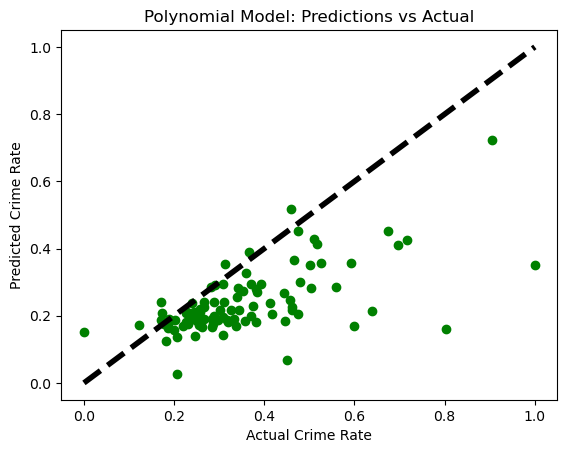

In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model of degree 3
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train) 

# Predict using the model
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Test MSE for Polynomial Regression:", mse_poly)

# Plot predictions vs actual
plt.scatter(y_test, y_pred_poly, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Polynomial Model: Predictions vs Actual')
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.show()


The polynomial regression model performs better than the OLS model. The predictions are again clustered around the lower end of the crime rate, indicating the same problem with higher crime rates as the OLS model. But the Polynomial Model seems to better capture the non-linear trend of the data. But the clustering in both models at lower crime rates might be related to the nature of the data.

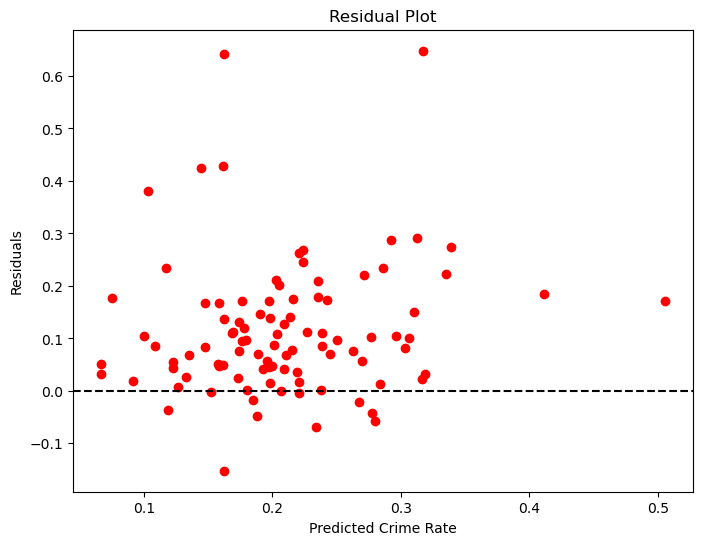

In [122]:
# Calculate residuals
PolyResiduals = y_test - y_pred_poly

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ols, PolyResiduals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Crime Rate')
plt.ylabel('Residuals')
plt.show()

The polynomial regression model suffers a little less from strong outliers. But the residuals are still clustered around the lower ranges of the crime rate.

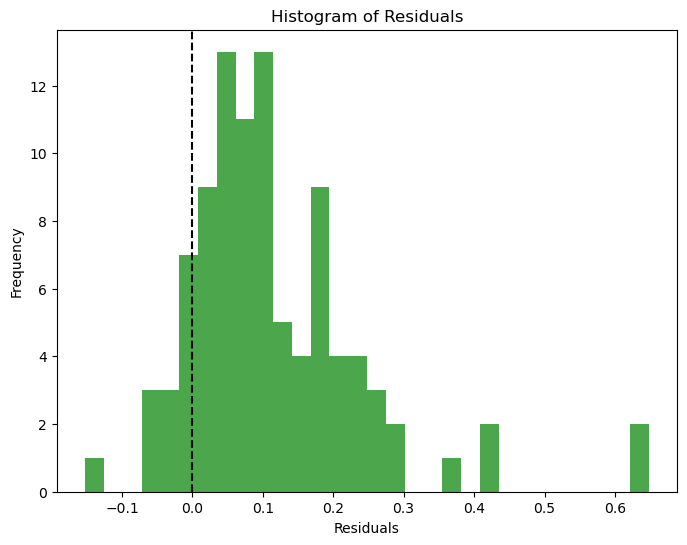

In [120]:
# Calculate residuals
PolyResiduals = y_test - y_pred_poly

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(PolyResiduals, bins=30, color='green', alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

This histogram also shows a non-normal distribution. But the range is more spread out than with the OLS model. This might indicate a improvement of the polynomial model over the linear model.

## 5. Conclusion and Discussion

Both the linear and the polynomial regression models show room for improvement. The test with real-world data indicates the two models' limitations for predicting the actual crime rate. By testing both linear and polynomial regression, we can guess that the limitations of the models stem from the data, not the method.
Crime rate is a complex phenomenon, and three relatively simple datasets seem to be too little data to make any strong predictions. The data itself is of high quality, but with around 90 municipalities, the volume of data seems quite small. Many other factors could have been integrated into the models, such as the level of education, income, variability in economic resources, and so on. But that would have been beyond the scope of this project.

Future work for this project might consist of a bigger collection of data, more transformation of such data to handle outliers, and a more precise selection of model. Using machine learning might prove even more effective for capturing the complexity of the subject. By using different years of the same datasets, the general volume of data could have been improved.